In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [1]:
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
import numpy as np

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [4]:
glass_df = pd.read_csv("glassdata.csv")
random = glass_df.sample(n=10)
random

,ID Number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
36,37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
89,90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
170,171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
70,71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
24,25,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00,1
168,169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
13,14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
97,98,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
99,100,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [5]:
glass_df.isnull().values.any()

False

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


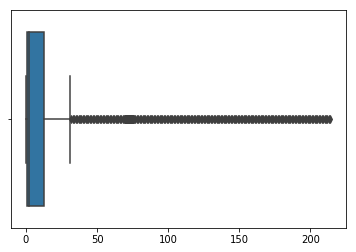

In [9]:
import seaborn as sns
sns.boxplot(glass_df)

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
glass_df.var()

ID Number           3834.166667
refractive index       0.000009
Sodium                 0.666841
Magnesium              2.080540
Aluminum               0.249270
Silicon                0.599921
Potassium              0.425354
Calcium                2.025366
Barium                 0.247227
Iron                   0.009494
Type of glass          4.425716
dtype: float64

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

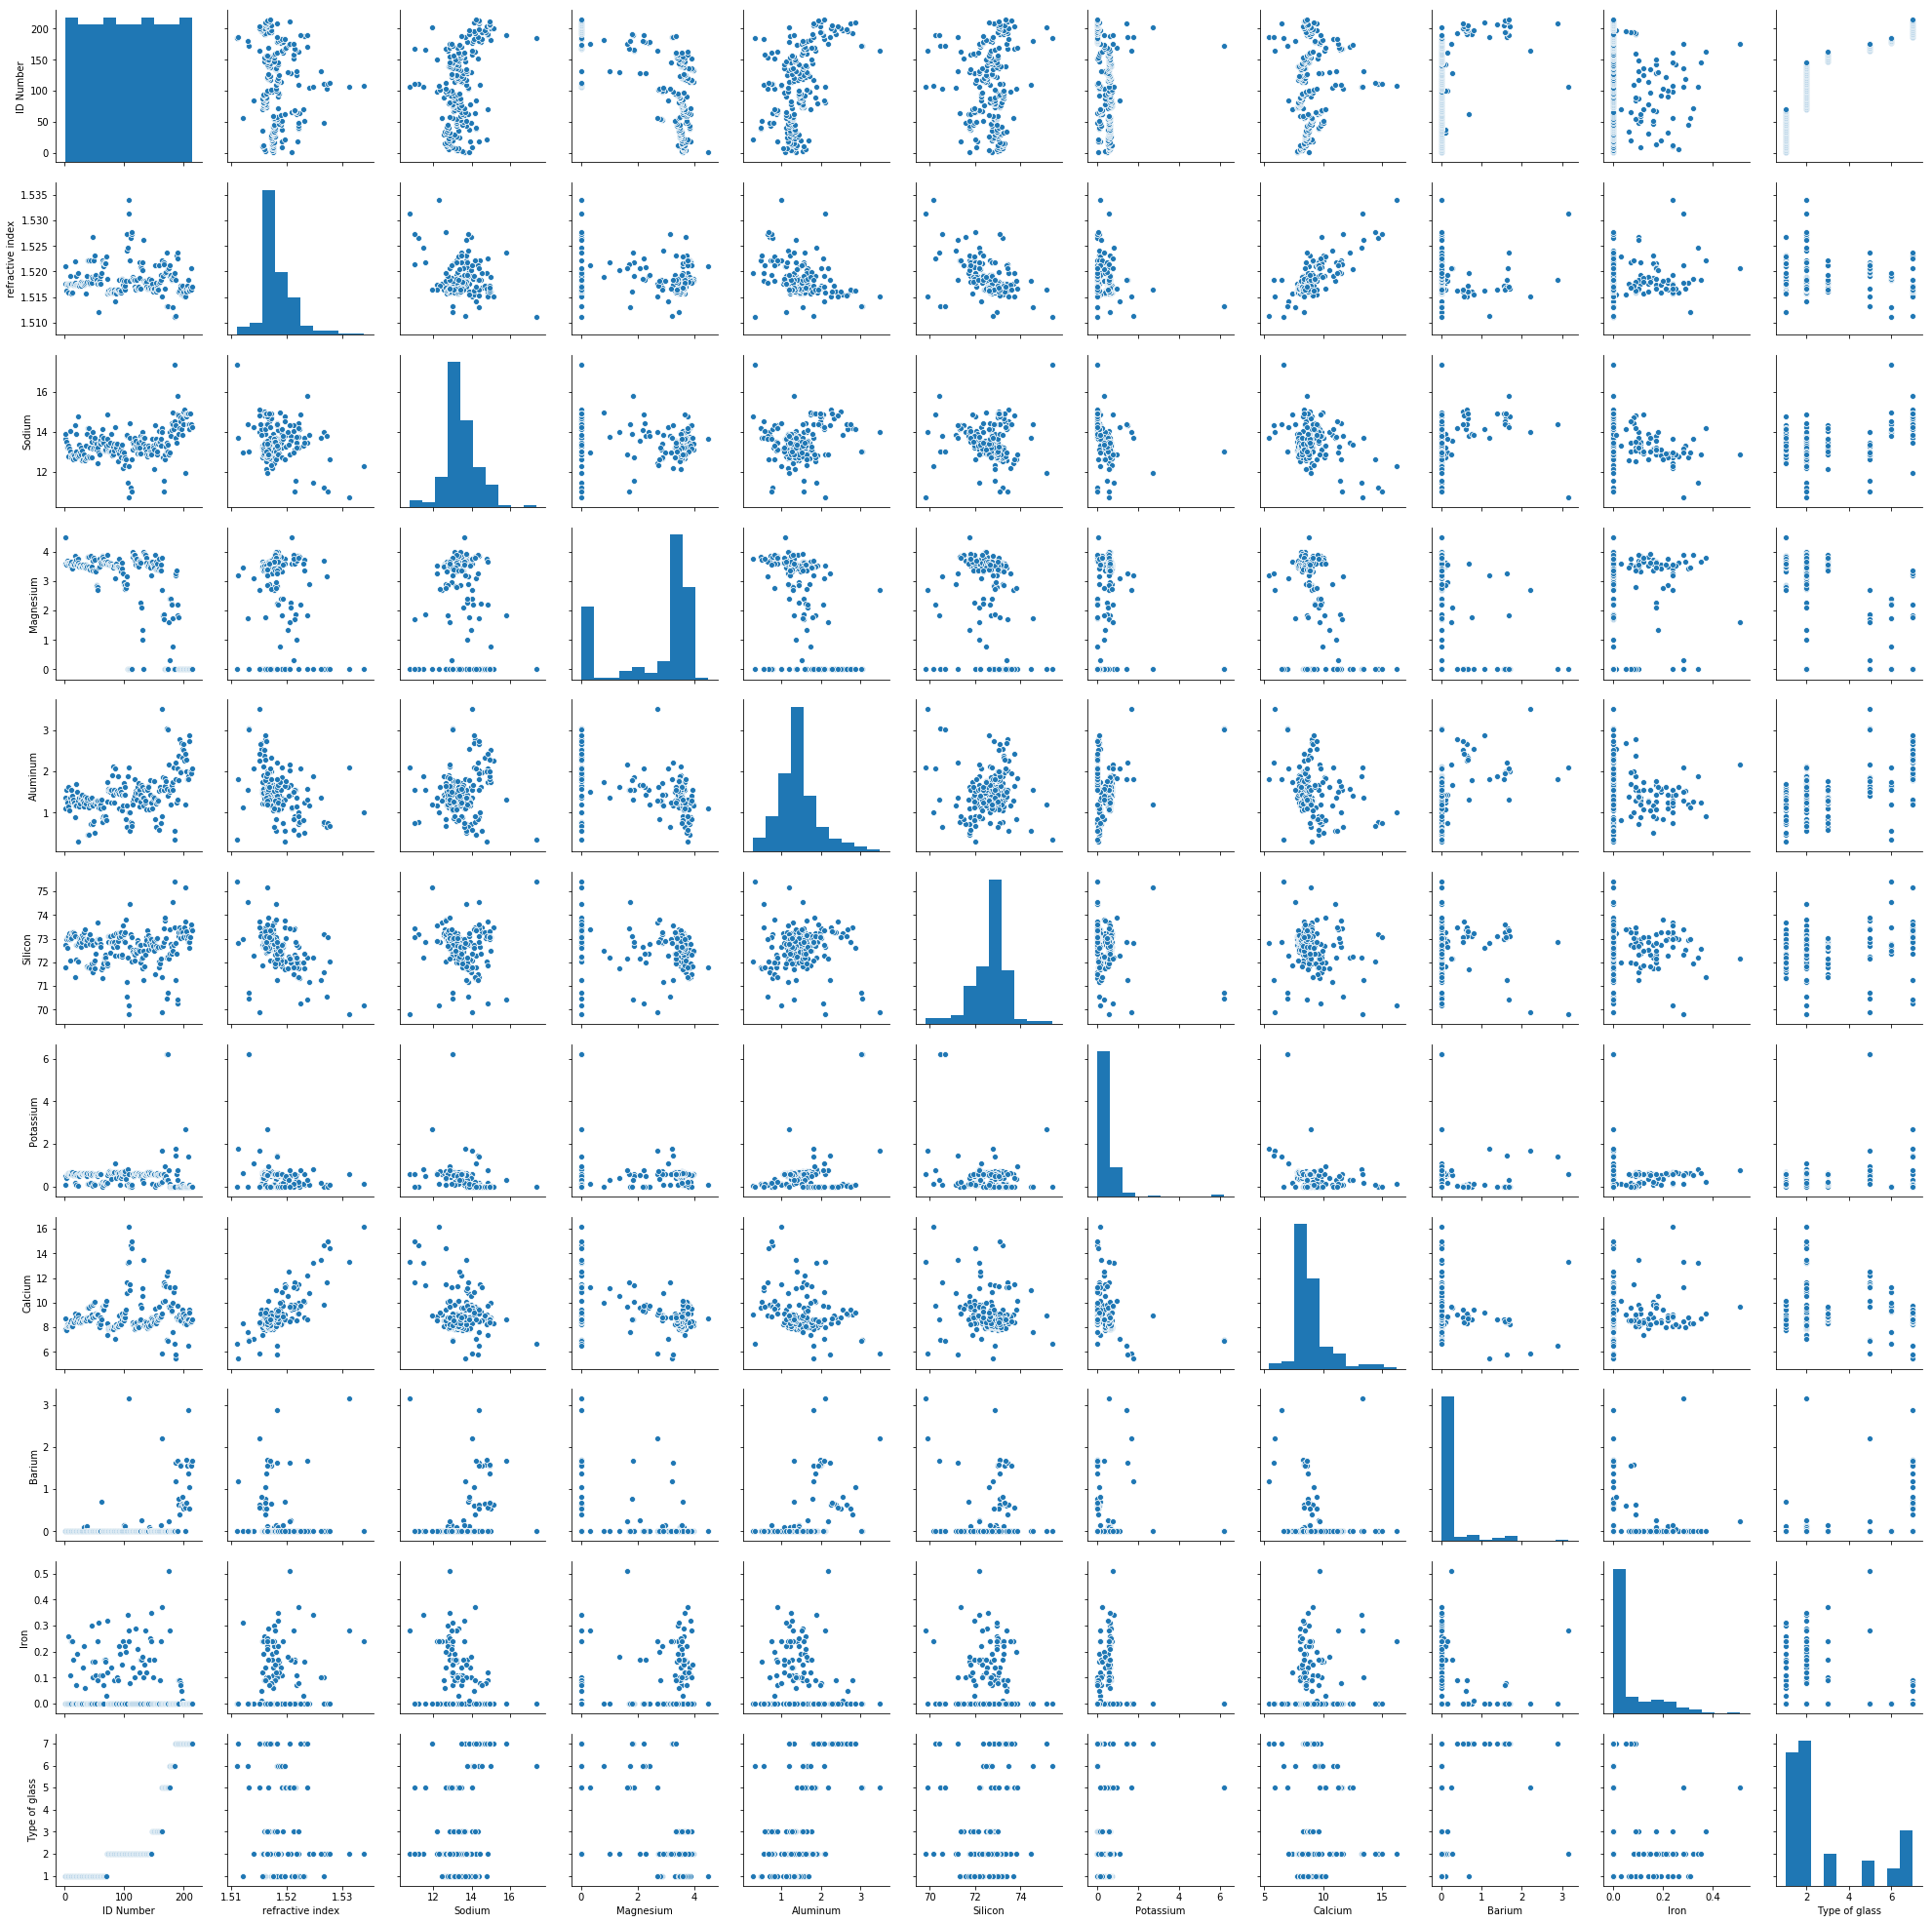

In [11]:
import seaborn as sns
sns.pairplot(glass_df)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
glass_feature_df = glass_df.drop(labels= "Type of glass" , axis = 1)
glass_feature_df

,ID Number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
glass_feature_df_z = glass_feature_df.apply(zscore)
glass_feature_df_z.describe()

,ID Number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.075183e-18,-2.668608e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-1.723976e+00,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-8.619880e-01,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,0.000000e+00,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,8.619880e-01,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,1.723976e+00,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [15]:
glass_labels = glass_df["Type of glass"]
glass_labels

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    6
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
200    7
201    7
202    7
203    7
204    7
205    7
206    7
207    7
208    7
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [16]:
X = np.array(glass_feature_df_z)
X.shape
glass_df

,ID Number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [17]:
y = np.array(glass_labels)
y.shape

(214,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [19]:
NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
NNH.score(X_test, y_test)

0.8923076923076924

In [21]:
y_predict = NNH.predict(X_test)
y_predict

array([6, 7, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 7,
       2, 1, 2, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 1, 2, 2, 2, 1, 1, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 3, 2, 2, 2, 5, 2, 7, 1, 2, 7, 2, 2, 2, 2, 1],
      dtype=int64)

In [22]:
NNH.score(X_test, y_test)

0.8923076923076924

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
myList = list(range(3,5,9))

In [26]:
cv_scores = []
k_neighbors = []

In [27]:
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
cv_scores

[0.8657392253136934]

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [28]:
cv_scores = []
k_neighbors = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

The optimal number of neighbors is 3


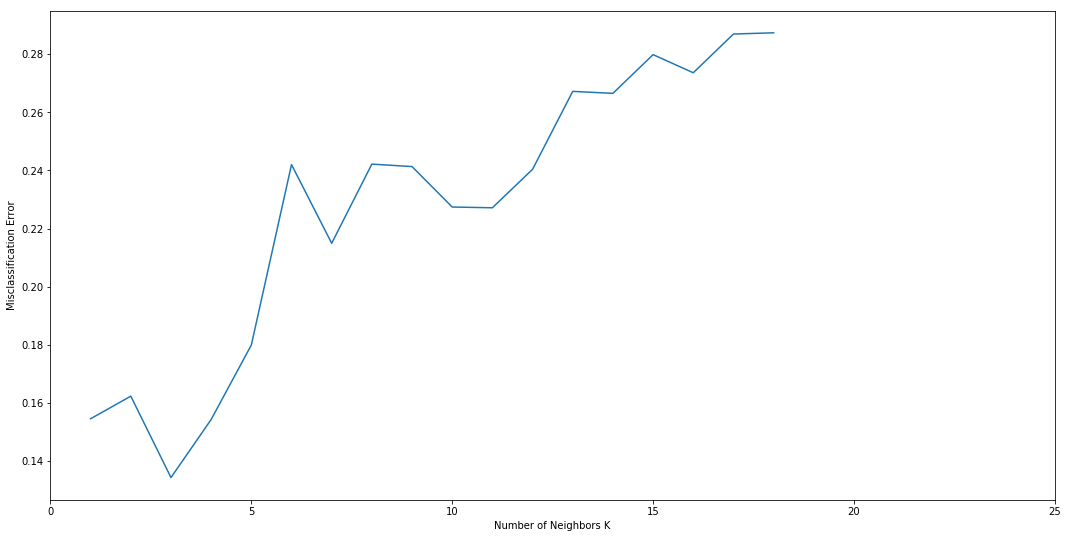

In [30]:
myList = list(range(1,19))
cv_scores = []
k_neighbors = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
